In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 101.1/data/diabetes.txt')

In [ ]:
df

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Print class frequencies through pandas 
(Tenere presente che target = 1 vuol dire che il paziente ha il diabete, 0 che non lo ha)

In [ ]:
print(df.groupby('target').size())

target
0    500
1    268
dtype: int64


Bar plot for the target variable

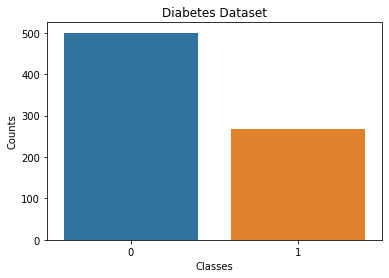

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="target", data=df)
plt.title("Diabetes Dataset")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

Transform the dataframe into a numpy matrix (numpy is the python package for scientific computing)

In [ ]:
import numpy as np
df = df.to_numpy()
x=df[:,0:-1] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=df[:,-1] # prendiamo solo l'ultima colonna -> variabile dipendente, target

#Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({1.0: 268, 0.0: 500})

In [ ]:
print(x[:10])
print(f'y = {y[:10]}')

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01]]
y = [1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


In [ ]:
# suppress scientific notation
np.set_printoptions(suppress=True)
print(x[:10])
print(f'y = {y[:10]}')

[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]
 [  1.     89.     66.     23.     94.     28.1     0.167  21.   ]
 [  0.    137.     40.     35.    168.     43.1     2.288  33.   ]
 [  5.    116.     74.      0.      0.     25.6     0.201  30.   ]
 [  3.     78.     50.     32.     88.     31.      0.248  26.   ]
 [ 10.    115.      0.      0.      0.     35.3     0.134  29.   ]
 [  2.    197.     70.     45.    543.     30.5     0.158  53.   ]
 [  8.    125.     96.      0.      0.      0.      0.232  54.   ]]
y = [1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=be78f833f949f02a3df7700e2a9e2cfd6ca7546113ae5c236f35eb5ec4f8730a
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
# https://scikit-learn.org/stable/ libreria per il Machine Learning in Python

# come per altri metodi di ML, dobbiamo prendere i nostri valori delle osservazioni e splittarle in due insiemi:
# training set: è il sottoinsieme delle osservazioni che serve al nostro metodo per imparare
# test set: è il sottoinsieme delle osservazioni che serve al nostro metodo per capire se ha imparato bene

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.33, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((514, 8), (514,), (254, 8), (254,))

In [ ]:
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[  5.    123.     74.     40.     77.     34.1     0.269  28.   ]
 [  6.     80.     66.     30.      0.     26.2     0.313  41.   ]
 [ 10.     68.    106.     23.     49.     35.5     0.285  47.   ]
 [ 12.     84.     72.     31.      0.     29.7     0.297  46.   ]
 [  2.    106.     64.     35.    119.     30.5     1.4    34.   ]
 [  2.     92.     76.     20.      0.     24.2     1.698  28.   ]
 [  6.     85.     78.      0.      0.     31.2     0.382  42.   ]
 [  2.     81.     72.     15.     76.     30.1     0.547  25.   ]
 [  7.    133.     84.      0.      0.     40.2     0.696  37.   ]
 [  2.    108.     52.     26.     63.     32.5     0.318  22.   ]]
y_train = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3) # impostiamo l'unico parametro (il numero di vicini)

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
# NB: notare che il metodo utilizza sia X_train che y_train, perché deve capire se sta predicendo correttamente
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
# NB: notare che c'è solo X perché le y devono essere previste dal metodo
predict = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 1. 1. 0. 1. 0. 1. 0. 1. 1.]
dati reali presenti nel dataset di test = [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


# Evaluate the results

Per valutare il nostro metodo, visualizziamo prima la cosiddetta "confusion matrix"

In [ ]:
#to be run only once, code for the installation of a new library
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


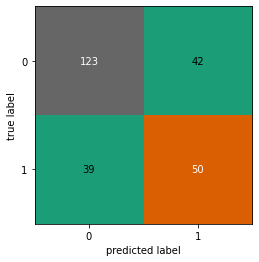

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

Vediamo di capire il suo significato, riprendendo l'esempio precedente e tenendo presente che le __predicted label__ rappresentano le previsioni del metodo (1 il paziente è diabetico, 0 non lo è) mentre le __true label__ rappresentano i dati reali presenti nel dataset (1 il paziente è diabetico, 0 non lo è):

- veri positivi (true positive, __TP__): 50 pazienti sono stati classificati come diabetici (predicted label = 1) ed effettivamente lo erano (true label = 1)
- veri negativi (true negative, __TN__): 123 pazienti sono stati classificati come __non__ diabetici (predicted label = 0) ed effettivamente __non__ lo erano (true label = 0)
- falsi negativi (false negative, __FN__): 39 pazienti sono stati classificati come __non__ diabetici (predicted label = 0)  anche se in realtà lo erano (true label = 1)
- falsi positivi (false positive, __FP__): 42 pazienti sono stati classificati come diabetici (predicted label = 1) anche se in realtà __non__ lo erano (true label = 0)

L'immagine seguente dovrebbe aiutare a capire meglio i vari TP, TN, FN, e FP:

<img src="https://drive.google.com/uc?export=view&id=1Y0MR_Jc85Sv58499sMwtxDPMKxnNiJtn"><br>

Una volta definito i TP, TN, FN ed FP, possiamo definire anche alcuni indicatori e utilizzarli per capire se il metodo classifica bene il fenomeno o no.

__accuracy: the fraction of predictions our model got right__<br>

è la percentuale di previsioni (classificazioni) corrette, sia per i casi positivi che per quelli negativi. Nel nostro caso rappresenta, in percentuale, quanti diabetici e non diabetici sono stati individuati (classificati) correttamente dal nostro metodo<br>
Vediamo come si calcola:<br>
\begin{equation*}
accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{50 + 123}{50 + 123 + 42 + 39} = 0,6873
\end{equation*}

Questo dato vuol dire che il metodo ha trovato correttamente chi ha il diabete e chi non lo ha nel __68%__ dei casi.

In genere è la prima metrica che viene osservata quando si valuta un classificatore. Tuttavia, quando i dati di test non sono bilanciati (quando cioè la maggior parte delle istanze appartengono a una delle classi TP, TN FP o FN) o si è più interessati alle prestazioni in una delle classi (ad esempio TP), l'accuratezza non riesce a dare un'idea dell'efficacia di un classificatore. Pensate per esempio al caso in cui si tratti di trovare i contagiati da Coronavirus in un insieme di persone. Supponiamo di avere un dataset con 1000 osservazioni. Sappiamo che in questo dataset ci sono 3 contagiati e 997 sani. Supponiamo di eseguire il nostro metodo e ottenere i seguenti risultati:

TP (il metodo dice che la persona è stata contagiata ed effettivamente lo è stata): 0

TN (il metodo dice che la persona non è stata contagiata ed effettivamente non lo è stata): 990

FN (il metodo dice che la persona non è stata contagiata ma in realtà lo è stata): 6

FP (il metodo dice che la persona è stata contagiata ma in realtà non lo è stata): 4

Se calcoliamo l'accuratezza otteniamo:

\begin{equation*}
accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{0 + 990}{0 + 990 + 4 + 6} = 0,99
\end{equation*}

Verrebbe da dire che è un metodo ottimo, perché ha una accuratezza del 99%. In realtà è un metodo che trova molti __non__ contagiati ma non trova neanche __un__ contagiato effettivo (TP = 0), che era invece il motivo per cui abbiamo cercato di utilizzare i metodi del Machine Learning. Per questo motivo è utile calcolare metriche aggiuntive che raccolgano aspetti più specifici della valutazione.

__precision: what proportion of positive identifications was actually correct?__<br><br>
è la percentuale di classificazioni positive corrette, cioè i positivi effettivi (true label = 1, predicted label = 1 ossia TP) rispetto a tutti quelli che il metodo ha classificato come positivi, sia correttamente (true label = 1, predicted label = 1 ossia TP) sia non correttamente (true label = 1, predicted label = 1 ossia FP). In formula:

\begin{equation*}
precision = \frac{TP}{TP + FP} 
\end{equation*}

Nel nostro caso è il rapporto tra il numero dei pazienti effettivamente diabetici e che il modello ha predetto essere tali (true label = 1, predicted label = 1) rispetto tutti quelli diagnosticati dal modello come diabetici (in modo corretto e no, predicted label = 1)<br>Vediamo il calcolo:

\begin{equation*}
precision = \frac{TP}{TP + FP} = \frac{50}{50 + 42} = 0,5435
\end{equation*}

Questo vuol dire che il __54%__ di chi è stato diagnosticato (classificato) dal metodo come diabetico lo era effettivamente. La _precision_ è massima quando non ci sono falsi positivi, cioè, nel nostro caso, quando non ci sono pazienti a cui è stato diagnosticato il diabete ma che in realtà non erano diabetici.

Calcoliamo ora la _precision_ per l'esempio del Coronavirus:

\begin{equation*}
precision = \frac{TP}{TP + FP} = \frac{0}{0 + 4} = 0
\end{equation*}

Questo risultato ci conferma quanto sapevamo già: questo metodo non è per niente utile nel caso dei contagi.

__recall: what proportion of actual positives was identified correctly?__

è la percentuale di veri positivi identificati correttamente, cioè i veri positivi (true label = 1, predicted label = 1 cioè TP) rispetto a tutti quelli che erano effettivamente positivi nel dataset e che il metodo ha trovato (true label = 1, predicted label = 1 cioè TP) e non ha trovato (true label = 1, predicted label = 0 cioè FN). In formula:

\begin{equation*}
recall = \frac{TP}{TP + FN} 
\end{equation*}


Nel nostro caso è il rapporto tra il numero dei pazienti che il modello ha predetto essere diabetici (true label = 1, predicted label = 1) rispetto tutti quelli effettivamente diabetici (true label = 1).<br>Vediamo il calcolo:<br>
\begin{equation*}
recall = \frac{TP}{TP + FN} = \frac{50}{50 + 39} = 0,5618
\end{equation*}

Questo vuol dire che il __56%__ dei diabetici presenti nel dataset è stato correttamente identificato (classificato). La _recall_ è massima quando non ci sono falsi negativi, pazienti cioè a cui non è stato diagnosticato il diabete ma che invece erano diabetici.

Calcoliamo ora la recall per l'esempio del Coronavirus:

\begin{equation*}
recall = \frac{TP}{TP + FN} = \frac{0}{0 + 6} = 0
\end{equation*}

Questo risultato rafforza quanto sapevamo già: questo metodo non è per niente utile nel caso dei contagi.

__f1-score: un indicatore riassuntivo__

A questo punto possiamo introdurre un indicatore riassuntivo di _precision_ e _recall_ che serve per dare un'indicazione di quanto il nostro metodo sia valido: l'___f1-score___

\begin{equation*}
f1-score = 2*\frac{precision*recall}{precision + recall}
\end{equation*}

Questo indicatore è la media armonica di _precision_ e _recall_ e serve per tenere conto dei falsi positivi e dei falsi negativi nella valutazione di un metodo, evitando di considerare i veri negativi. Infatti l'accuratezza può essere molto influenzata da un numero elevato di veri negativi (TN) che nella maggior parte delle applicazioni reali non sono rilevanti (ad esempio non sono particoalrmente interessato a sapere se un paziente non è diabetico), mentre i falsi negativi e i falsi positivi di solito sono importanti (pensate al caso di un diabetico che non viene curato (FN) o al caso di sottoporre a cure costose un paziente che non è diabetico (FP)).

_f1-score_ è quindi un misura migliore da usare (rispetto l'_accuracy_) se dobbiamo cercare un equilibrio tra _precision_ e _recall_ nel caso in cui ci sia un numero di TP, TN, FP o FN irregolare.

Notare che _f1-score_ è massimo quando _precision_ e _recall_ sono uguali a 1 (cioè quando i falsi negativi e i falsi positivi sono uguali a 0), come si può vedere dal grafico seguente ( _p_ = _precision_ , _r_ = _recall_ ): 


<img src="https://drive.google.com/uc?export=view&id=1so-vxRtAsnOUbda1XSaCYlOlqoSMhTT0" width="500" align="center"><br>



Proviamo ora a calcolare l'_f1-score_ per il nostro caso:

\begin{equation*}
f1-score = 2*\frac{precision*recall}{precision + recall} = 2*\frac{0,5435*0,5618}{0,5435 + 0,5618} = 0,5525
\end{equation*}

Il nostro metodo non si comporta quindi particolarmente bene, visto che l'_f1-score_ massimo è 1. 

Adesso che abbiamo capito i vari indicatori, stampiamo il report dei vari indicatori:

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.76      0.75      0.75       165
         1.0       0.54      0.56      0.55        89

    accuracy                           0.68       254
   macro avg       0.65      0.65      0.65       254
weighted avg       0.68      0.68      0.68       254



Come possiamo vedere, abbiamo ritrovato i valori precedentemente calcolati per l'_accuracy_ , la _precision_ e la _recall_ (per i pazienti diabetici, target = 1.0). Notare che gli stessi indicatori (tranne l'_accuracy_ che è complessiva) si possono calcolare anche per l'altro caso, cioè per i __non__ diabetici: dalla comparazione dei risultati vediamo che il metodo funziona meglio se dobbiamo trovare chi __non__ è diabetico.

# Utilizzare il metodo

Al di là dei risultati che ci hanno dato i nostri indicatori, supponiamo che il nostro metodo sia un ottimo metodo per valutare (classificare) se una persona è diabetica o no: come fa un medico  ad applicarlo ai dati di un paziente che gli arriva nello studio? Supponiamo per esempio che Maria abbia la seguente situazione

In [ ]:
!pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tabulate import tabulate

info = ['timespreg', 'gluctol', 'diaspb', 'triceps', 'insulin', 'massindex', 'pedigree', 'age'] # nome delle misurazioni
Maria= [10., 68., 106., 23., 49., 35.5, 0.285, 47.] # valore delle misurazioni
print(tabulate([Maria], headers=info))

  timespreg    gluctol    diaspb    triceps    insulin    massindex    pedigree    age
-----------  ---------  --------  ---------  ---------  -----------  ----------  -----
         10         68       106         23         49         35.5       0.285     47


Proviamo a far girare il nostro metodo con questi dati e vediamo che cosa ci dice:

In [ ]:
# previsione per Maria
Maria = [[10., 68., 106., 23., 49., 35.5, 0.285, 47.]]
predictMaria = neigh.predict(Maria)
predictMaria

array([0.])

La risposta è 0, cioà il metodo dice che Maria non ha il diabete (cioè, visto che stiamo usando il metodo K-NN, Maria è più 'vicina' a pazienti che non hanno il diabete). Vediamo ora che cosa sarebbe successo se Maria avesse un indice relativo all'insulina di 159 invece che 49:

In [ ]:
# nuova previsione per Maria
Maria = [[10., 68., 106., 23., 159., 35.5, 0.285, 47.]]
predictMaria = neigh.predict(Maria)
predictMaria

array([1.])

La risposta è 1, cioè il metodo dice che Maria, con questi nuovi valori, ha il diabete (cioè è più 'vicina' a pazienti che hanno il diabete).

# Esercizio dTree

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML 101.1/data/diabetes.txt')

In [ ]:
import numpy as np

dfnp = df.to_numpy()
x=dfnp[:,0:-1] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=dfnp[:,-1] # prendiamo solo l'ultima colonna -> variabile dipendente, target

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size =0.33, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((514, 8), (514,), (254, 8), (254,))

In [ ]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn import tree

# impostiamo i parametri del metodo
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
tree_clf = tree.DecisionTreeClassifier(criterion="gini", # criteri per stabilire come splittare
                                       max_depth=4, # profondità dell'albero per evitare l'overfitting
                                       min_samples_split=30, # dimensione minima del sottogruppo a cui fermarsi (no more split)
                                       max_leaf_nodes=6, # numero dei nodi foglia
                                       min_samples_leaf=4 # numero di campioni per essere una foglia
                                      )

# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
tree_clf.fit(X_train,y_train)

# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
predict = tree_clf.predict(X_test)

# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0. 1. 1. 0. 1. 0. 1. 0. 1. 1.]
dati reali presenti nel dataset di test = [1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]


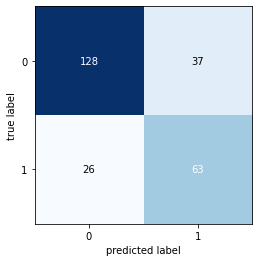

In [ ]:
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict))
plt.show()

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80       165
         1.0       0.63      0.71      0.67        89

    accuracy                           0.75       254
   macro avg       0.73      0.74      0.73       254
weighted avg       0.76      0.75      0.75       254



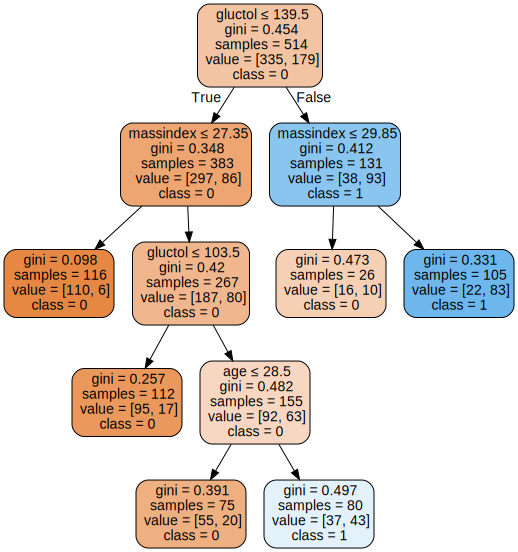

In [ ]:
#save the feature list into a vector (sono i nomi delle colonne del dataset)
features=list(df.columns.values)

import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                     feature_names=features[0:-1],  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render('diabetes')
graph

il metodo dTree è più preciso in entrambi i risultati